<a href="https://colab.research.google.com/github/CaptainRedCodes/Learning-Generative-AI/blob/main/Word_and_Sentence_Embeddings.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
### Word and Sentence Embeddings
import numpy as np
import seaborn as sns
import altair as alt
from sklearn.metrics.pairwise import cosine_similarity

In [3]:
!pip install gensim


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 27.9/27.9 MB 76.1 MB/s eta 0:00:00


In [31]:
sentences = [
    ["cats", "are", "very", "cute"],
    ["dogs", "are", "very", "loyal"],
    ["cats", "and", "dogs", "are", "animals"],
    ["i", "love", "cats"],
    ["i", "love", "dogs"],
    ["hello", "world"],
    ["hello", "there"],
    ["why", "do", "cats", "purr"],
    ["why", "do", "dogs", "bark"],
    ["who", "are", "you"],
    ["who", "is", "the", "president"],
    ["deep", "learning", "is", "fun"],
    ["deep", "learning", "uses", "neural", "networks"],
    ["machine", "learning", "is", "interesting"],
    ["learning", "new", "things", "is", "good"],
    ["rush", "hour", "is", "a", "funny", "movie"],
    ["rush", "hour", "2", "is", "also", "funny"],
    ["i", "watched", "rush", "hour"],
    ["what", "a", "great", "shot"],
    ["joe", "root", "played", "a", "great", "shot"],
    ["europe", "looks", "beautiful"],
    ["i", "want", "to", "travel", "to", "europe"],
    ["my", "goal", "is", "to", "become", "a", "doctor"],
    ["the", "doctor", "helped", "the", "patient"],
    ["movies", "are", "fun", "to", "watch"],
    ["i", "love", "watching", "movies"],
    ["funny", "movies", "make", "me", "happy"],
    ["technology", "is", "changing", "the", "world"],
    ["the", "world", "is", "big"],
    ["cats", "sleep", "a", "lot"],
    ["dogs", "love", "to", "play"],
    ["neural", "networks", "are", "powerful"],
    ["learning", "never", "stops"]
]


In [32]:
from gensim.models import Word2Vec

model = Word2Vec(
    sentences,
    vector_size=50,
    window=5,
    min_count=1,
    workers=4,        # CPU threads
    sg=1              # 1 = skip-gram, 0 = CBOW
)

model.train(sentences, total_examples=len(sentences), epochs=100)


(4728, 14100)

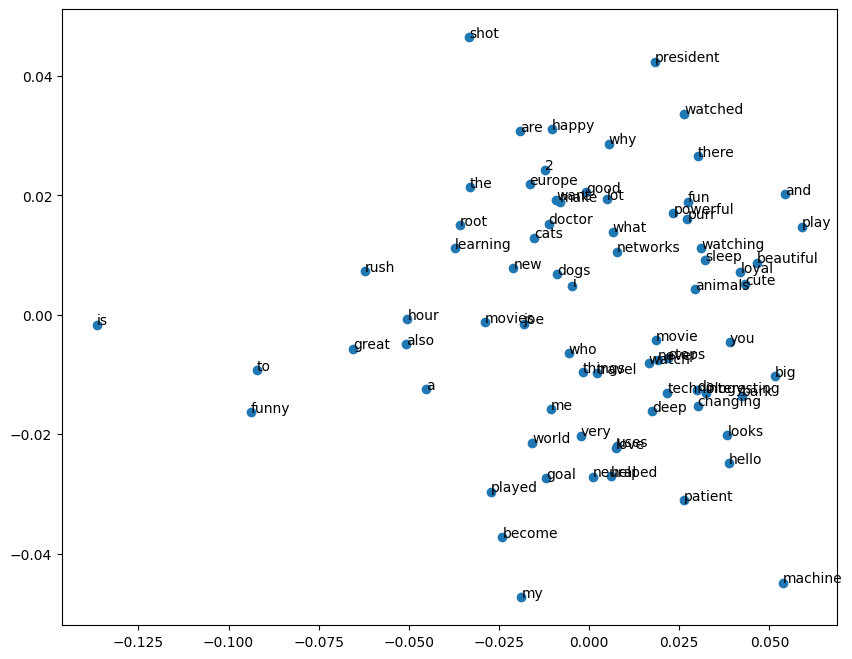

In [34]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

words = list(model.wv.index_to_key)
word_vectors = model.wv[words]

pca = PCA(n_components=2)
result = pca.fit_transform(word_vectors)

plt.figure(figsize=(10, 8))

plt.scatter(result[:, 0], result[:, 1])

for i, word in enumerate(words):
    plt.annotate(word, xy=(result[i, 0], result[i, 1]))

plt.show()


In [35]:
!pip install sentence-transformers


In [36]:
sentences = [
    "Hello world",
    "I like cats",
    "Cats are very cute",
    "What a shot by Joe Root",
    "Europe looks beautiful",
    "My goal is to become a doctor",
    "I love machine learning",
    "Machine learning is fun",
    "Deep learning uses neural networks",
    "I love deep learning",
    "Movies are fun to watch"
]


In [37]:
from sentence_transformers import SentenceTransformer

model = SentenceTransformer('all-MiniLM-L6-v2')


/usr/local/lib/python3.12/dist-packages/huggingface_hub/utils/_auth.py:104: UserWarning: 
Error while fetching `HF_TOKEN` secret value from your vault: 'Requesting secret HF_TOKEN timed out. Secrets can only be fetched when running from the Colab UI.'.
You are not authenticated with the Hugging Face Hub in this notebook.
If the error persists, please let us know by opening an issue on GitHub (https://github.com/huggingface/huggingface_hub/issues/new).
  warnings.warn(


modules.json:   0%|          | 0.00/349 [00:00<?, ?B/s]

config_sentence_transformers.json:   0%|          | 0.00/116 [00:00<?, ?B/s]

README.md: 0.00B [00:00, ?B/s]

sentence_bert_config.json:   0%|          | 0.00/53.0 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/612 [00:00<?, ?B/s]

model.safetensors:   0%|          | 0.00/90.9M [00:00<?, ?B/s]

tokenizer_config.json:   0%|          | 0.00/350 [00:00<?, ?B/s]

vocab.txt: 0.00B [00:00, ?B/s]

tokenizer.json: 0.00B [00:00, ?B/s]

special_tokens_map.json:   0%|          | 0.00/112 [00:00<?, ?B/s]

config.json:   0%|          | 0.00/190 [00:00<?, ?B/s]

In [38]:
embeddings = model.encode(sentences)


In [39]:
from sklearn.metrics.pairwise import cosine_similarity

similarity = cosine_similarity(
    [embeddings[1]],  # "I like cats"
    [embeddings[2]]   # "Cats are very cute"
)

print("Similarity:", similarity[0][0])


Similarity: 0.68058884


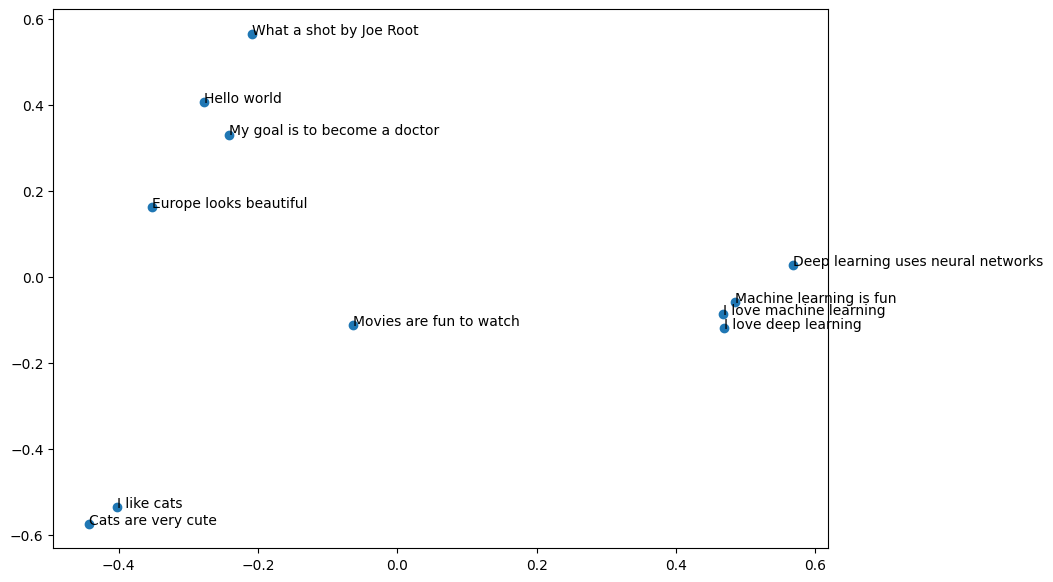

In [40]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

pca = PCA(n_components=2)
reduced = pca.fit_transform(embeddings)

plt.figure(figsize=(10, 7))
plt.scatter(reduced[:, 0], reduced[:, 1])

for i, sentence in enumerate(sentences):
    plt.annotate(sentence, (reduced[i, 0], reduced[i, 1]))

plt.show()
